In [29]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("C:\\Users\\Harsh sharma\\Desktop\AI\ML_intern_assignment\\Address_classifier\\data\\task_dataset - training_dataset.csv")

In [31]:
df.head

<bound method NDFrame.head of                                        property_address       categories
0     Shop No. Ii 108 And Ii 36 Radha Raman Textile ...  commercial unit
1     Vishwakarma Industrial Estate F-1Near Nh8 Pipo...  commercial unit
2     Shop No. 367 Karnal New Grain Market Near Mark...  commercial unit
3     Patta No,57 Va 58,Khasra No 699,Village And Gp...       landparcel
4     Unit-900-Block-X Rajdhani Metropolis Village-R...           others
...                                                 ...              ...
2676  Unit-265,Part-Of-266 Jasuja City Khasra No.69/...           others
2677  Flat-1301,Floor-13 Trinetra Silvernest Tower-B...             flat
2678  Khassra 1298(65-13),Khewat2063,District Abohar...       landparcel
2679  Unit-447 Wallfort Paradise S No Kh238,544,994/...           others
2680  House Block No 1,Plot 46 Westpart,Gat 176,Stre...      houseorplot

[2681 rows x 2 columns]>

In [32]:
df['categories'].unique()

array(['commercial unit', 'landparcel', 'others', 'houseorplot', 'flat'],
      dtype=object)

In [33]:
df.isna().sum()

property_address    0
categories          0
dtype: int64

In [34]:
summary = df['categories'].describe()

print(summary)

count     2681
unique       5
top       flat
freq       970
Name: categories, dtype: object


In [35]:
category_counts = df['categories'].value_counts()
print(category_counts)

categories
flat               970
houseorplot        802
others             359
commercial unit    290
landparcel         260
Name: count, dtype: int64


<Axes: xlabel='categories'>

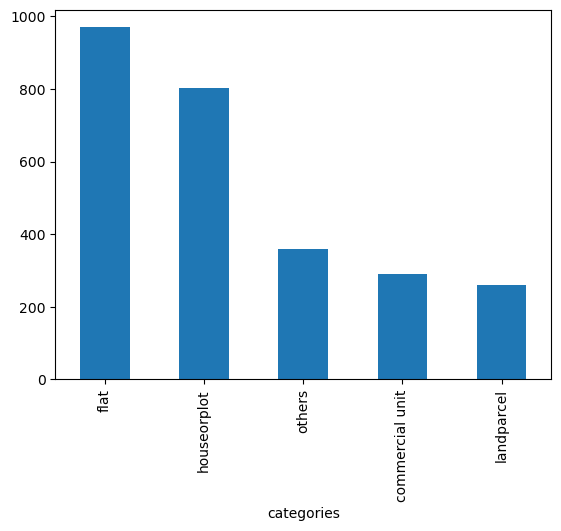

In [36]:
df["categories"].value_counts().plot(kind="bar")


In [37]:
print("Duplicate Addresses:", df["property_address"].duplicated().sum())

Duplicate Addresses: 33


In [38]:
df["property_address"].value_counts().head(20)


property_address
S No 587/17, Plot No 6 7, Patta No 5391, Settinaickenpatti Village, Dindigul, Dindigul, Tamil Nadu,\n  India, \n  624004                                                                                                                                                                                                                                                                                                                                           2
Third Floor Back Side With Roof Rights Area Meas. 75 Sq. Yds., Out Of 150 Sq. Yds., Built Up Property Bearing No. 52 New No. D-28\n Out Of Khasra No. 113/7 Situated In The Area Of Village Palam Delhi State Delhi Colony Known As Mahavir Enclave Gali No. 48 New\n Delhi-110059                                                                                                                                                                                 2
S No 47, Plot No 157/158, 159/5, Gaurinandan Residency, Row Bunglow No 5, Sai

In [39]:
# Group by address and count unique categories for each
category_check = df.groupby("property_address")["categories"].nunique()

# Addresses where categories are consistent (only 1 unique type)
same_category = category_check[category_check == 1]

# Addresses where categories conflict (more than 1 type)
mixed_category = category_check[category_check > 1]

print("Same category duplicates:", len(same_category))
print("Conflicting category duplicates:", len(mixed_category))


Same category duplicates: 2648
Conflicting category duplicates: 0


In [40]:
df_clean = df.drop_duplicates(subset=["property_address"], keep="first")


In [42]:
df_clean.to_csv("C:\\Users\\Harsh sharma\\Desktop\AI\ML_intern_assignment\\Validation_data/cleaned_dataset.csv", index=False)

print("Original rows:", len(df))
print("Cleaned rows:", len(df_clean))
print("Duplicate rows removed:", len(df) - len(df_clean))
print("Cleaned dataset saved as data/cleaned_dataset.csv")

Original rows: 2681
Cleaned rows: 2648
Duplicate rows removed: 33
Cleaned dataset saved as data/cleaned_dataset.csv
